In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]
import sys
sys.path.append('../../core')
%matplotlib inline


In [18]:
import torch
torch.manual_seed(0)
import torch.optim as optim
import dojo
from display import*
from DNN import DNN


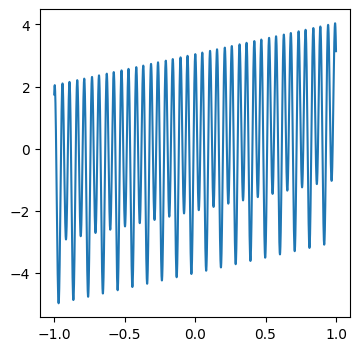

In [19]:

# experiment in stability of inverting frequency domain (0-inf) -> (inf to 0) as a way to have DNN learn high frequency features first

f = lambda x: np.sin(60*x) + 3*np.cos(120*x) + x
x = np.linspace(-1,1,10000)
plt.plot(x,f(x))

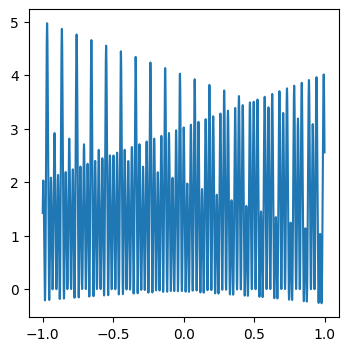

In [79]:
# t = alternating 1 and -1, length of x, interspersed
a = -120
t = np.cos(a*x)
plt.plot(x,f(x)*t)

In [87]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ltx = torch.tensor(x).float().reshape(-1,2).to(device)
lty = torch.tensor(f(x)).float().reshape(-1,2).to(device)
htx = torch.tensor(x).float().reshape(-1,2).to(device)
hty = torch.tensor(f(x)*t).float().reshape(-1,2).to(device)
lhy = torch.stack([lty,hty],dim=1).reshape(-1,4)

In [88]:
D = dojo.dojo()
D.optimizer = lambda x : optim.ASGD(x, lr=0.01)

100%|██████████| 400/400 [00:03<00:00, 107.27it/s]


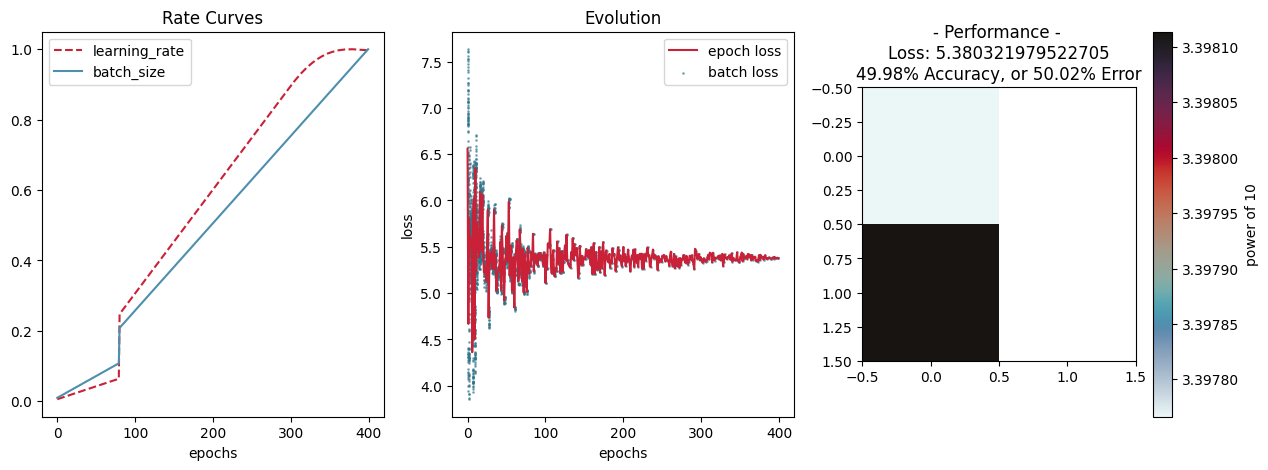

In [89]:
D.max_batch_size=ltx.shape[0]
lnet = DNN(sizes=[2,40,40,40,2], d2_input=False, classification=False) # expect 1.6% error rate
lnet.to(device)
report = D.train(lnet, ltx, lty)
ecran(lnet, ltx, lty, torch.nn.MSELoss(), report)

100%|██████████| 400/400 [00:05<00:00, 77.30it/s] 


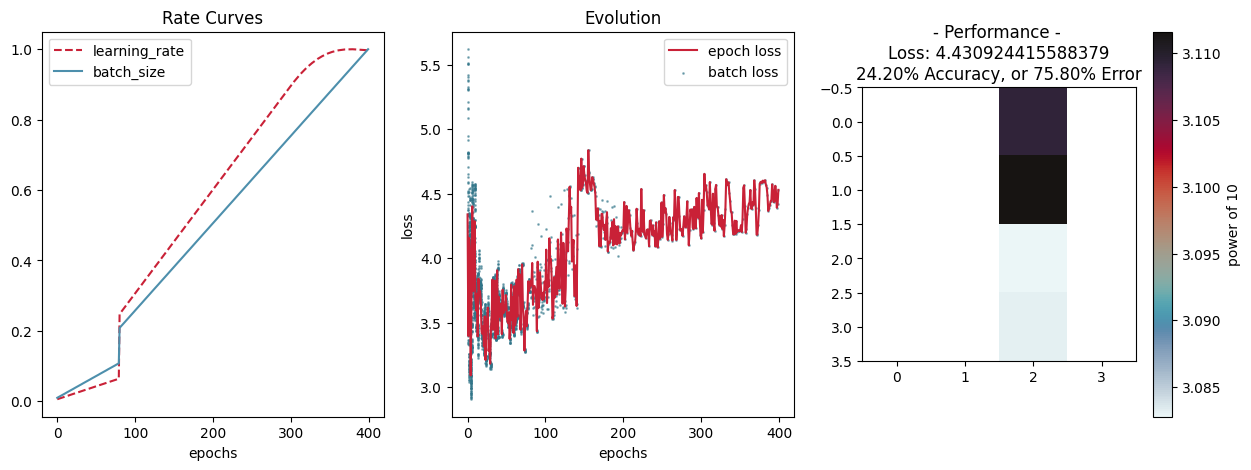

In [91]:
D.max_batch_size=htx.shape[0]
hnet = DNN(sizes=[2, 40, 40, 40, 4], d2_input=False, classification=False) # expect 1.6% error rate
hnet.to(device)
report = D.train(hnet, htx, lhy)
ecran(hnet, htx, lhy, torch.nn.MSELoss(), report)